<a href="https://colab.research.google.com/github/gsanjos97/Ciencia-de-Dados-Estudo-sobre-Incendios-no-Brasil/blob/main/Estudo_sobre_Inc%C3%AAndios_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Surtos de incêndios no Brasil no ano de 2020

De acordo com o Inpe (Instituto Nacional de Pesquisas Espaciais), 2020 foi o ano com o maior número de focos de incêndios em uma década no Brasil, resultando em perca de biodiversidade e mudanças climáticas. Diante disso, esse estudo irá abordar algumas análises referentes a esse tema.



# Leitura de Dados com Pandas

Importando as bibliotecas:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

Em seguida, será importado o Dataset:

In [ ]:
df = pd.read_csv('Focos_2020-01-01_2020-12-31.csv', index_col=None)
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6
4,2020/07/11 16:50:00,AQUA_M-T,Brasil,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7


# Manipulação e limpeza de dados com Pandas

Para realizar a manipulação e limpeza dos dados, é necessário conhecer a base de dados.

Para verificarmos o tamanho do Dataset:

In [ ]:
df.shape

(222797, 12)

O Dataset é composto por 222.797 linhas e 12 colunas.

Além de fornecer o tamanho, a função info() fornece outras informações importantes como nomes das colunas e os tipos de variáveis .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222797 entries, 0 to 222796
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datahora      222797 non-null  object 
 1   satelite      222797 non-null  object 
 2   pais          222797 non-null  object 
 3   estado        222797 non-null  object 
 4   municipio     222797 non-null  object 
 5   bioma         222797 non-null  object 
 6   diasemchuva   217727 non-null  float64
 7   precipitacao  217727 non-null  float64
 8   riscofogo     217727 non-null  float64
 9   latitude      222797 non-null  float64
 10  longitude     222797 non-null  float64
 11  frp           220164 non-null  float64
dtypes: float64(6), object(6)
memory usage: 20.4+ MB


O Dataset é composto 12 colunas, sendo metade das colunas de variáveis qualitativas, enquanto a outra metade é de variáveis quantitativas.

Para vizualizarmos melhor os nomes das colunas do Dataset:

In [ ]:
df.columns

Index(['datahora', 'satelite', 'pais', 'estado', 'municipio', 'bioma',
       'diasemchuva', 'precipitacao', 'riscofogo', 'latitude', 'longitude',
       'frp'],
      dtype='object')

### Exclusão e criação de colunas

Depois de conhecer melhor o nosso Dataset, vamos excluir algumas colunas e  criar uma coluna.

As colunas satelite e pais, apresentam apenas um unico valor. Como isso não vai agregar em nossa análise, vamos excluir-las.

In [ ]:
columns = ['satelite', 'pais']
df.drop(columns, inplace=True, axis=1)

Com a exclusão das colunas, o próximo passo será a criação de uma nova coluna, que será a coluna referente aos meses em que ocorreram os focos de incêndios. Essa coluna será necessária, pois não temos ela diretamente. Vamos obter-la por meio da coluna datahora.

In [ ]:
df['datahora'] = pd.to_datetime(df['datahora'])
df['mes'] = df['datahora'].dt.strftime('%b')

Com isso, a coluna datahora já pode ser excluída.

In [ ]:
columns = ['datahora']
df.drop(columns, inplace=True, axis=1)

### Verificação de colunas com valores nulos

Com a etapa de exclusão e criação da tabela concluída, agora vamos saber se há colunas com valores nulos. 

In [ ]:
print(df.isnull().any())

estado          False
municipio       False
bioma           False
diasemchuva      True
precipitacao     True
riscofogo        True
latitude        False
longitude       False
frp              True
mes             False
dtype: bool


Existe quatro colunas com valores nulos: diasemchuva, precipitacao, riscofogo e frp. Então, para saber a quantidade dos valores nulos por colunas, vamos fazer:

In [ ]:
df.isnull().sum()

estado             0
municipio          0
bioma              0
diasemchuva     5070
precipitacao    5070
riscofogo       5070
latitude           0
longitude          0
frp             2633
mes                0
dtype: int64

### Tratando os dados ausentes com a mediana dos valores

Para não deixar valores ausentes, vamos preencher com a mediana.

Mediana para preencher coluna dos dias sem chuva:

In [ ]:
# Extrair a mediana da coluna diasemchuva
df_mediana_diasemchuva = df.diasemchuva.median()

print('Mediana: ', df_mediana_diasemchuva)

# Preencher a coluna Dias em Chuva com a mediana 
df.fillna (df_mediana_diasemchuva, inplace = True)

Mediana:  10.0


Mediana para preencher coluna de precipitação:

In [ ]:
#Extrair a mediana da coluna precipitacao  
df_mediana_precipitacao = df.precipitacao.median()

print('Mediana: ', df_mediana_precipitacao)

#Preencher a coluna Dias em Chuva com a mediana 
df.fillna (df_mediana_precipitacao, inplace = True)


Mediana:  0.0


Mediana para preencher coluna de risco de fogo:

In [ ]:
# Extrair a mediana da coluna precipitacao  
df_mediana_riscofogo = df.riscofogo.median()

print('Mediana: ', df_mediana_riscofogo)

# Preencher a coluna Dias em Chuva com a mediana 
df.fillna (df_mediana_riscofogo, inplace = True)

Mediana:  1.0


Mediana para preencher coluna de risco de FRP:

In [ ]:
#Extrair a mediana da coluna frp
df_mediana_frp = df.frp.median()

print('Mediana: ', df_mediana_frp)

#Preencher a coluna Dias em Chuva com a mediana 
df.fillna (df_mediana_frp, inplace = True)

Mediana:  29.2


Após preenchimento dos valores ausentes com as medianas, será visto se ainda há valores ausentes:

In [ ]:
df.isnull().sum()

estado          0
municipio       0
bioma           0
diasemchuva     0
precipitacao    0
riscofogo       0
latitude        0
longitude       0
frp             0
mes             0
dtype: int64

### Tratando Outliers em Variáveis Númericas

A função describe() do Pandas apresenta a distribuição de cada variável, ela nos proporciona diversas informações do Dataset, inclusive nos permite descobrir se nas variáveis númericas há outliers.

In [ ]:
df.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,222797.000000,222797.000000,222797.000000,222797.000000,222797.000000,222797.000000
mean,20.372797,0.918199,-4.691518,-11.170909,-53.032945,65.500323
std,82.027486,3.304308,74.820547,6.460917,7.454275,146.004559
min,-999.000000,0.000000,-999.000000,-33.557000,-73.669000,0.000000
25%,3.000000,0.000000,0.400000,-15.914000,-57.393000,15.300000
50%,10.000000,0.000000,1.000000,-9.805000,-52.925000,29.200000
75%,35.000000,0.000000,1.000000,-6.647000,-47.386000,62.500000
max,120.000000,125.500000,10.000000,5.149000,-34.823000,8589.800000


A distribuição mostra, outliers das variáveis: diasemchuva e riscofogo e assim, será preciso tratar os outliers. 

Na variável dos dias sem chuva, é impossivél ter menos que 0 dias sem chover durante o ano. Na coluna diasemchuva valores menores que 0, serão substituídos pela mediana.

In [ ]:
df['diasemchuva'] = df.diasemchuva.mask(df.diasemchuva < 0,df.diasemchuva.median())

Na variável risco de fogo, é impossivél o índice ser menor que 0 e maior que 1, logo, serão tratados também com a mediana:

In [ ]:
df['riscofogo'] = df.riscofogo.mask(df.riscofogo > 1,df.riscofogo.median())

In [ ]:
df['riscofogo'] = df.riscofogo.mask(df.riscofogo < 0,df.riscofogo.median())

Após o tratamento dos Outliers o Dataset ficou da seguinte forma:

In [ ]:
df.head()

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
0,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,Jul
1,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5,Jul
2,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0,Jul
3,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,Jul
4,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7,Jul


# Descritivo e exploração de dados com pandas

### Quantidade de ocorrência registrado por estado.

In [ ]:
df.groupby(['estado']).estado.count().sort_values(ascending=False)

estado
MATO GROSSO            47708
PARA                   38603
MARANHAO               16817
AMAZONAS               16729
TOCANTINS              12093
MATO GROSSO DO SUL     12080
RONDONIA               11145
PIAUI                   9317
ACRE                    9193
MINAS GERAIS            8737
BAHIA                   7912
SAO PAULO               6123
GOIAS                   6008
CEARA                   3979
RIO GRANDE DO SUL       3612
PARANA                  3519
SANTA CATARINA          2425
RORAIMA                 1930
PERNAMBUCO              1017
PARAIBA                  910
AMAPA                    750
RIO DE JANEIRO           693
RIO GRANDE DO NORTE      664
ESPIRITO SANTO           401
DISTRITO FEDERAL         196
ALAGOAS                  159
SERGIPE                   77
Name: estado, dtype: int64

In [ ]:
df.loc[df.estado == "MATO GROSSO"].groupby('municipio').agg({'municipio':'count','riscofogo':'mean'})

,municipio,riscofogo
municipio,,
ACORIZAL,75,0.993333
AGUA BOA,147,0.791837
ALTA FLORESTA,209,0.712919
ALTO ARAGUAIA,164,0.897561
ALTO BOA VISTA,165,0.855152
...,...,...
VALE DE SAO DOMINGOS,116,0.966379
VARZEA GRANDE,49,0.975510
VERA,71,0.483099


### Quantidade de dias sem chuva, e a media do cada estado que e mais propício ao incendio.

In [ ]:
df.sort_values(['estado'],ascending=False).groupby('estado').agg({'diasemchuva':'sum','riscofogo':'mean'})

,diasemchuva,riscofogo
estado,,
ACRE,40460.0,0.418101
ALAGOAS,1939.0,0.936478
AMAPA,5488.0,0.550933
AMAZONAS,180119.0,0.525333
BAHIA,220434.0,0.903185
CEARA,131239.0,0.949686
DISTRITO FEDERAL,10577.0,0.954592
ESPIRITO SANTO,7566.0,0.860599
GOIAS,244277.0,0.899534


### Ocorrência em todos meses

In [ ]:
df.groupby(['mes']).mes.count().sort_values(ascending=False)

mes
Sep    69329
Aug    50694
Oct    41468
Jul    15804
Nov    13463
Dec     7408
Jun     7109
Apr     4117
May     4002
Mar     3880
Jan     2866
Feb     2657
Name: mes, dtype: int64

Total de ocorencias referente ao mes que possui mais ocorrencias junto com a media de cada estado que e mais propício ao incendio .

In [ ]:
df.loc[df.mes == "Sep"].groupby('estado').agg({'estado':'count','riscofogo':'mean'})

,estado,riscofogo
estado,,
ACRE,3357,0.265624
ALAGOAS,4,0.975000
AMAPA,84,0.421429
AMAZONAS,4270,0.378571
BAHIA,1918,0.988634
CEARA,440,0.995000
DISTRITO FEDERAL,83,1.000000
ESPIRITO SANTO,131,0.964122
GOIAS,1825,0.985425


# Figuras que mostrem insights sobre os dados com pandas e matplotlib

**1 - Distribuição das variáveis númericas**

Um histograma é uma ferramenta de análise e representação de dados quantitativos, agrupados em classes de frequência que permite distinguir a forma, o ponto central e a variação da distribuição, além de outros dados como amplitude e simetria na distribuição dos dados. O histograma faz parte das ferramentas básicas da qualidade que podem ser aplicadas em situações menos complexas (quando se faz necessário o uso das ferramentas gerenciais).
 Aplicamos o histograma quando precisamos:
*   Verificar o número de produto não conforme;
*   Determinar a dispersão dos valores de medidas em peças;
*   Analisar a possibilidade de ações corretivas em um processo;
*   Encontrar e mostrar uma distribuição de dados por gráfico de barras com certo número de unidades por cada categoria;
*   Encontrar e mostrar por meio de gráfico o número de unidade por cada categoria.

array([[<AxesSubplot:title={'center':'diasemchuva'}>,
        <AxesSubplot:title={'center':'precipitacao'}>],
       [<AxesSubplot:title={'center':'riscofogo'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'frp'}>]], dtype=object)

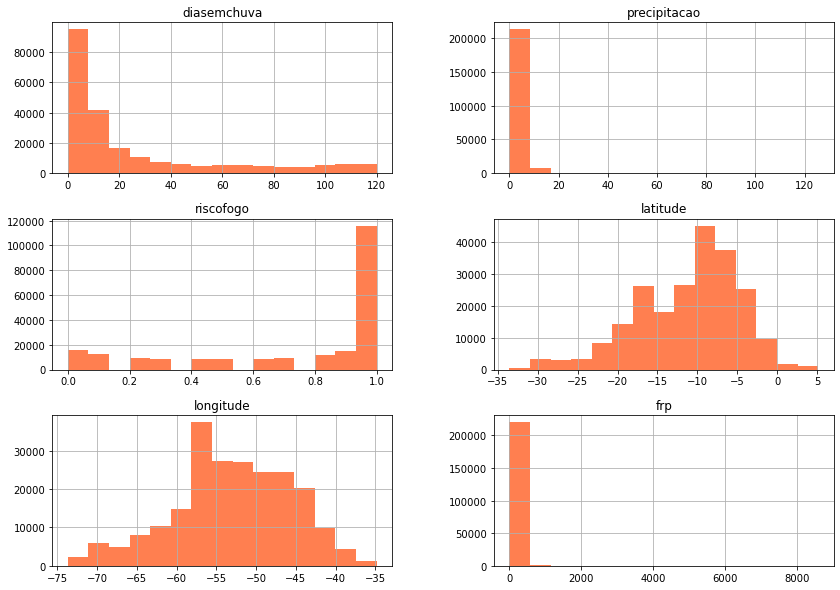

In [ ]:
df.hist(bins=15, figsize=(14,10), color="coral")

**2 - Análise de correlação das variáveis**

<AxesSubplot:>

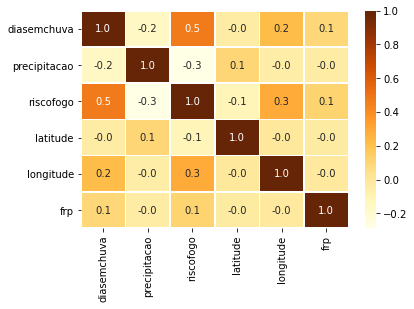

In [ ]:
matrix = df.corr()
sns.heatmap(matrix, cmap="YlOrBr", annot = True, fmt=".1f", linewidths=.6)

A correlação indica como as váriaveis estão relacionadas uma com as outras.

**3 - Quatidade de ocorrências de focos de incêndio por estado no ano de 2020**

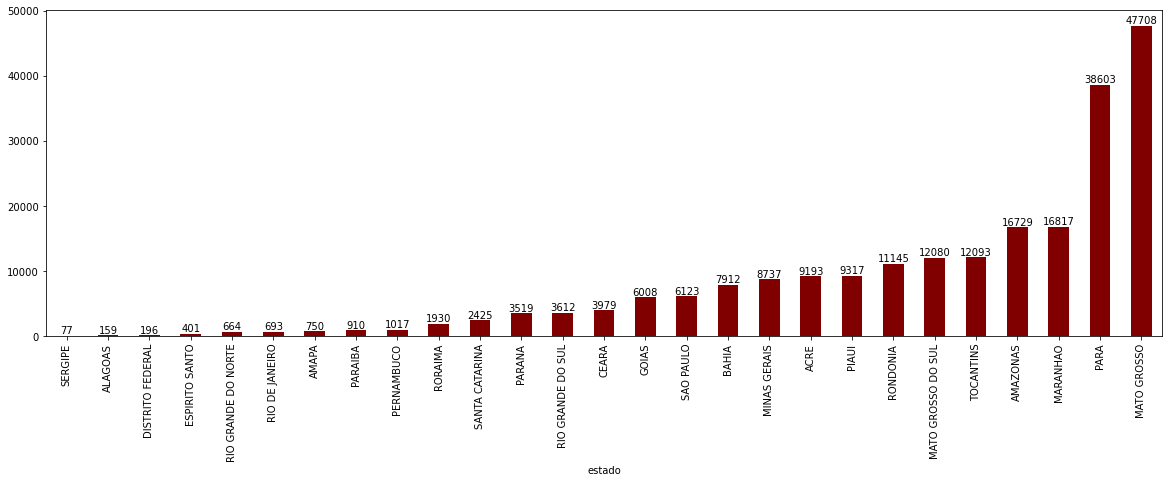

In [ ]:
estados = df.groupby ('estado')['estado'].count().sort_values().plot(kind = 'bar', width=0.5, figsize=(20,6), color = 'maroon')

for e in estados.patches:
	b=e.get_bbox()
	estados.annotate("{:.0f}".format(b.y1+b.y0), ((b.x0 + b.x1)/2 - 0.0005, b.y1 + 300), va='baseline',color='black',ha='center')


O gráfico de barras representa a quantidade de focos que ocorreu nos estados do Brasil. Tendo em vista que o estado de Sergipe teve o menor índice de queimas e o Mato Grosso com o maiores focos de queimadas. 

**4 - Os 15 municípios que mais registraram ocorrências de focos de incêndio em 2020**

<AxesSubplot:ylabel='Municípios'>

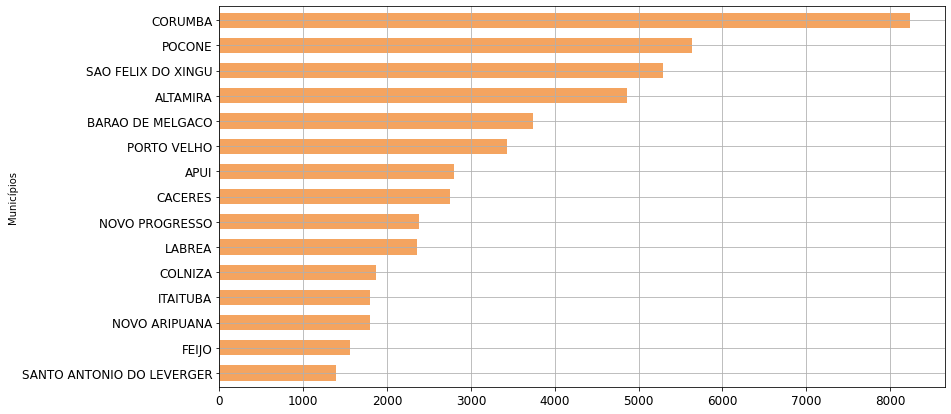

In [ ]:
df.groupby(['municipio']).municipio.count().sort_values()[-15:].plot(kind='barh',
figsize=(13,7), ylabel='Quantidade de Focos de Incêndios', xlabel='Municípios', grid=True, color= 'sandybrown', fontsize=12, width=0.6)

No gráfico de barras horizontal representa a quantidade de focos com maiores ocorrências nos Municípios do país, Corumba em 2020  foi um locais bastante castigados pelas queimadas deste ano com quase o dobro segundo colocado Pocone.

**5 - Distribuição dos dias sem chuva de acordo com o risco de fogo**

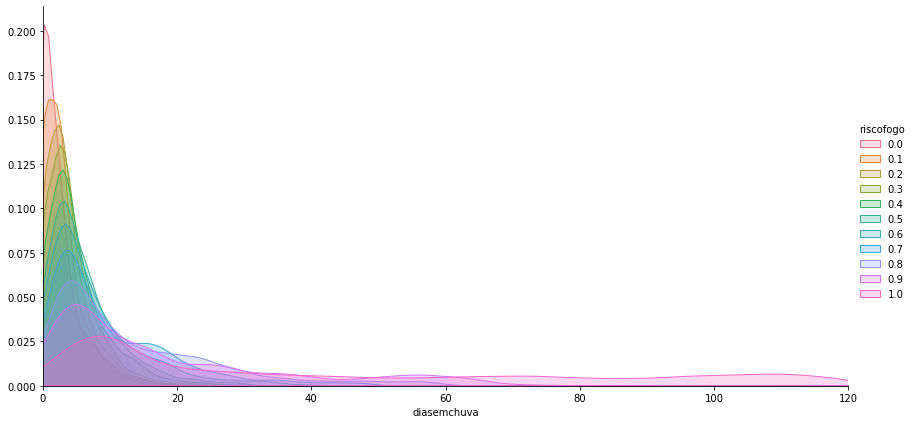

In [ ]:
def plot_line_graph(x, hue):
    fig = sns.FacetGrid(df, hue=hue, aspect=2, height=6)
    fig.map(sns.kdeplot, x, shade=True)
    fig.set(xlim=(0, df[x].max()))
    fig.add_legend()
    return fig

plot_line_graph('diasemchuva', 'riscofogo')

Quanto maior o número de dias sem chover, maior o índice de risco de fogo.

 **6 - Plotagem do risco de fogo pela latitude e longitude**

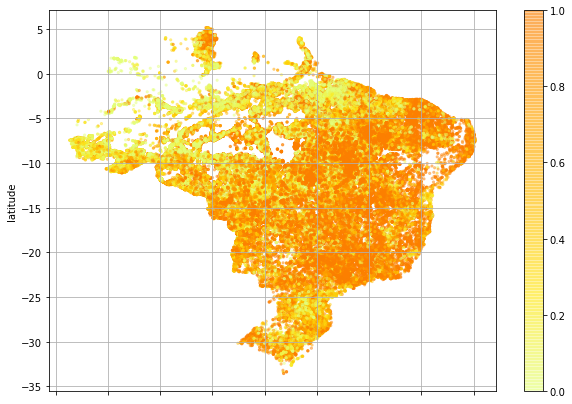

In [ ]:
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, grid=True, c=df['riscofogo'], s=5,
              cmap=plot.get_cmap('Wistia'), figsize=(10,7));

O foco mais escuro é o mais próximo de 1, que são os municipios com maior índice de foco de incêndio.


**7 - Quantidade de focos de incêndios por bioma**

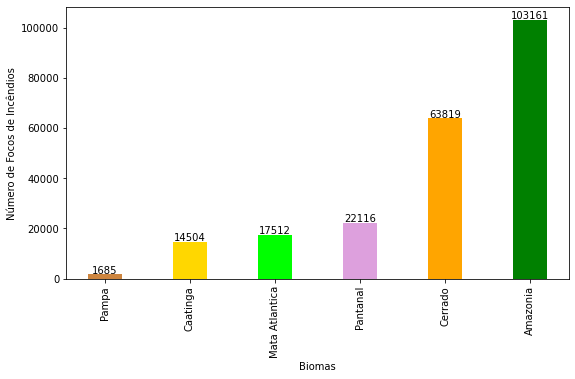

In [ ]:
estados = df.groupby ('bioma')['bioma'].count().sort_values().plot(kind = 'bar', xlabel = 'Biomas', ylabel='Número de Focos de Incêndios',
                                                                   width=0.4, figsize=(9,5), color = ['peru', 'gold', 'lime', 'plum', 'orange', 'green'],
                                                                   grid = False)

for e in estados.patches:
	b=e.get_bbox()
	estados.annotate("{:.0f}".format(b.y1+b.y0), ((b.x0 + b.x1)/2 - 0.0005, b.y1 + 500), va='baseline',color='black',ha='center')

No gráfico podemos relatar que Amazonia tem o maior bioma de vegetação do pais e que se não houver uma analise de toda região completa  pode acabar ocorrer incêndios de grandes proporções.

**8 - Comparação entre a quantidade do FRP e a quantidade de dias sem chover**

FRP (sigla em inglês para Potência Radiativa do Fogo): essa medida demonstra a energia emitida. Por exemplo, o fogo proveniente de desmatamento, possui emissão enegértica maior e consequentemente o FRP é maior.

<Figure size 576x360 with 0 Axes>

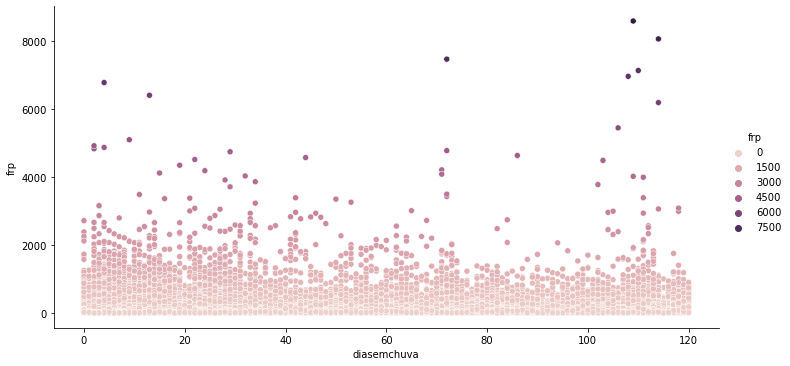

In [ ]:
plot.figure(figsize=(8,5))
sns.relplot(x='diasemchuva', y='frp', hue="frp", data=df, aspect=2.0)

Algumas das maiores quantidades de FRP, aconteceram em municípios que apresentaram uma grande quantidade de dias sem chuva. Porém, mesmo em municípios com poucos dias sem chuva, alguns números de FRP foram grandes, o que mostra que podem está associados a fogos provenientes de desmatamento.

**9 - Quantidade de focos de incêndios por mês**

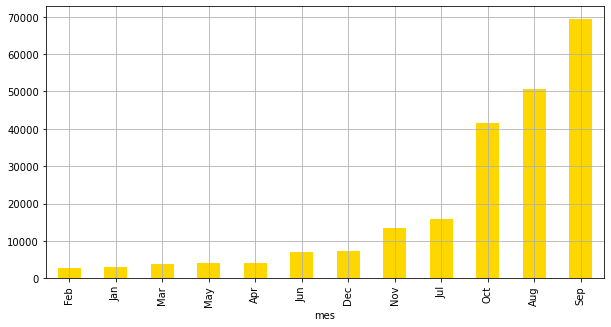

In [ ]:
estados = df.groupby ('mes')['mes'].count().sort_values().plot(kind = 'bar', width=0.5, figsize=(10,5), color = 'gold', grid=True)


A quantidade de focos incêndios nos meses de outubro, agosto, setembro. Tem a ter menores tempo de chuva para o país correndo diversos pequenos focos de incêndio que pode acabar agravando nos estados.

**10 - Dias sem chuva nos biomas através do boxplot**

C:\Users\Lopes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


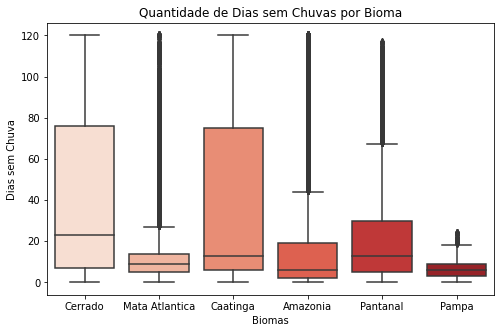

In [ ]:
plot.figure(figsize=(8,5))
sns.boxplot( df['bioma'], df['diasemchuva'], palette="Reds", linewidth=1.5)
plot.xlabel("Biomas")
plot.ylabel("Dias sem Chuva")
plot.title("Quantidade de Dias sem Chuvas por Bioma");

No Cerrado tem o pior índice de chuvas para o seu bioma, chegando a ter meses sem chuva, juntamente com a caatinga.

# Quebrar os dados em conjunto de treino e conjunto de teste


Nesta parte separamos os dados em dois conjuntos, teste e treino. Afim da não utilização de uma base muito massiva para ambas as designações. Sendo assim precisamos fazer essa divisão não física afim de otimizar a execução do modelo.

In [ ]:
# Separando Inputs e Outputs

columns = ['municipio', 'estado', 'bioma', 'mes']

X = df.drop(columns, axis = 1)
y = df.bioma

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

# Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino 

Nesta etapa do modelo estamos forçando o aprendizado da máquina com métodos de regressão e classificação, onde por meio da regressão preve-se os resultados da saída de forma contínua, ou seja, o modo de operação está tentando mapear a entrada com o objetivo de uma maior acurácia na ao obter a saída. Já na classificação utilizamos um modo de operação mais simples, atribuimos um rótulo à ela com a intensão de classificar a saída do resultado de forma distinta.

 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3)
X_train

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
179448,2.0,0.0,0.3,-10.521,-68.728,11.6
41082,5.0,0.0,1.0,-17.212,-56.968,55.0
60189,10.0,0.0,0.1,-25.051,-52.610,7.8
81147,45.0,0.0,1.0,-16.447,-56.204,231.2
161854,0.0,0.3,0.1,-6.097,-53.418,23.0
...,...,...,...,...,...,...
12931,12.0,0.0,0.5,-4.224,-60.690,18.6
131998,3.0,0.0,1.0,-17.627,-57.199,24.5
114792,22.0,1.4,1.0,-6.346,-52.613,118.2
65729,6.0,0.0,1.0,-6.583,-54.914,28.8


# Verificar o desempenho do estimador do scikit-learn no conjunto de teste

Nesta etapa do código chamamos de pré-processamento de dados onde é foco é obter o resultado de acuracia do modelo através do conjunto de teste, que nos retornará uma estimativa de precisão e quão boa foi a construção do machine learning.

In [ ]:
Knn2 = KNeighborsClassifier(n_neighbors = 3)
Knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
accuracy_score(y_test, Knn2.predict(X_test))

0.9019066598443433

In [ ]:
#Pré processando os inputs

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm

array([[3.58333333e-01, 0.00000000e+00, 1.00000000e+00, 4.55820803e-01,
        6.38444113e-01, 1.28058861e-03],
       [3.50000000e-01, 0.00000000e+00, 9.00000000e-01, 4.55898310e-01,
        6.38547083e-01, 1.10596289e-03],
       [3.16666667e-01, 0.00000000e+00, 8.00000000e-01, 3.01245285e-01,
        8.06492303e-01, 1.51342290e-03],
       ...,
       [9.16666667e-02, 1.59362550e-03, 8.00000000e-01, 3.36252777e-01,
        7.20280080e-01, 1.30387203e-03],
       [8.33333333e-02, 1.43426295e-02, 1.00000000e-01, 7.93597892e-01,
        6.57957061e-01, 2.27013435e-03],
       [1.66666667e-02, 1.27490040e-02, 1.00000000e-01, 8.05714876e-01,
        5.96663749e-01, 6.63577732e-04]])

In [ ]:
#Verificando se houve melhoria na qualidade do classificador

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=2/3)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

accuracy_score(y_test, knn3.predict(X_test))

0.9696900331241752